In [1]:
import torch

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from dataset import HandGestureDataset
from model import HandGestureModel

In [5]:
model = HandGestureModel()
model.load_state_dict(torch.load('./models/2022-04-30-0/model.pt'))
model.eval()

val_dataset = HandGestureDataset(data_path='../data/dataset.json', dataset='test')

              precision    recall  f1-score   support

           0     1.0000    0.9335    0.9656       331
           1     0.4936    0.2340    0.3175       329
           2     0.0000    0.0000    0.0000       359
           3     0.0000    0.0000    0.0000       346
           5     0.0000    0.0000    0.0000         0

    accuracy                         0.2828      1365
   macro avg     0.2987    0.2335    0.2566      1365
weighted avg     0.3615    0.2828    0.3107      1365



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_cla

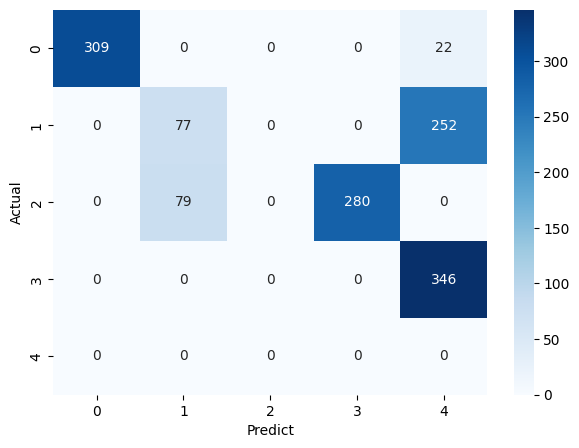

In [6]:
y_pred = []
y_true = []

for input, label in val_dataset:
    pred = model(torch.tensor([input]))
    y_pred.append(pred.argmax().item())
    y_true.append(label.argmax().item())

print(classification_report(y_true, y_pred, digits=4))
plt.figure(figsize=(7, 5))
ax = sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues', fmt='g')
ax.set(xlabel='Predict', ylabel='Actual')
plt.show()